# Final Results - EUCHEMS 2018

In [1]:
from sklearn.utils import class_weight

from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Merge,Flatten,Dropout
from keras.layers import Conv1D,Reshape
from keras.layers import LSTM
import keras

# For the plots 
import matplotlib.pyplot as plt

# For controlling the training parameters in the midst of training itself
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

# For creating directory to save the models
import os
from imblearn.over_sampling import SMOTE

from sklearn.utils import class_weight

from keras.utils.np_utils import to_categorical   


import turicreate as tc


Using TensorFlow backend.


In [17]:
# Load the data
X = np.load("X_reg.npy")
Y = np.load("Y_reg.npy")

Y = np.log10(Y)


from sklearn.preprocessing import RobustScaler

sc_y = RobustScaler().fit(Y.reshape(-1, 1))
Y = sc_y.transform(Y.reshape(-1, 1))
Y = Y.reshape(-1,)

In [18]:
SY =  tc.SArray(Y)
SY.show()

Materializing SArray...

Done.

# Normal Regression

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
dataY_train =  tc.SArray(Y_train.tolist())
dataX_train = tc.SArray(X_train.tolist())
data_train = tc.SFrame()
data_train = data_train.add_column(dataX_train,'X')
data_train = data_train.add_column(dataY_train,'Soluble')

dataY_test =  tc.SArray(Y_test.tolist())
dataX_test = tc.SArray(X_test.tolist())
data_test = tc.SFrame()
data_test = data_test.add_column(dataX_test,'X')
data_test = data_test.add_column(dataY_test,'Soluble')

# train_data, test_data = data.random_split(0.8)

reg_model = tc.boosted_trees_regression.create(data_train, target='Soluble',features = ['X'],max_iterations = 600)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 2431

Number of features          : 1

Number of unpacked features : 101

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.061553     | 3.943760           | 2.866671             | 0.773104      | 0.896174        |

| 2         | 0.099727     | 3.409814           | 2.427495             | 0.631243      | 0.753531        |

| 3         | 0.129405     | 2.790117           | 2.177829             | 0.531888      | 0.663813        |

| 4         | 0.167078     | 2.402244           | 2.128570             | 0.463117      | 0.613076        |

| 5         | 0.224479     | 1.970294           | 1.696620             | 0.417550      | 0.579956        |

| 6         | 0.266837     | 1.850266           | 1.627039             | 0.385336      | 0.556590        |

| 11        | 0.455263     | 1.240068           | 1.806008             | 0.291426      | 0.534672        |

| 25        | 1.116815     | 0.778141           | 1.657670             | 0.183050      | 0.535648        |

| 50        | 1.991158     | 0.522924           | 1.511157             | 0.081356      | 0.535441        |

| 51        | 2.027010     | 0.514737           | 1.512545             | 0.079624      | 0.535186        |

| 75        | 2.970585     | 0.235877           | 1.509503             | 0.038606      | 0.537663        |

| 100       | 3.989804     | 0.116853           | 1.516853             | 0.019401      | 0.538443        |

| 101       | 4.030787     | 0.116193           | 1.516498             | 0.018997      | 0.538531        |

| 125       | 4.849948     | 0.113506           | 1.526636             | 0.010498      | 0.538620        |

| 150       | 5.679410     | 0.112952           | 1.523113             | 0.005944      | 0.538056        |

| 175       | 6.521187     | 0.112620           | 1.522110             | 0.003999      | 0.538288        |

| 200       | 6.954929     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 225       | 7.260419     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 250       | 7.450807     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 275       | 7.651828     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 300       | 7.886050     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 325       | 8.083259     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 350       | 8.289112     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 375       | 8.620856     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 400       | 8.846033     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 425       | 9.057636     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 450       | 9.286366     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 475       | 9.484616     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 500       | 9.670836     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 501       | 9.679065     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 525       | 9.871493     | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 550       | 10.047621    | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 575       | 10.215798    | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

| 600       | 10.388337    | 0.112983           | 1.522116             | 0.003718      | 0.538244        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

In [108]:
# reg_model.evaluate(data_test)
import sklearn
from math import sqrt
predictions = reg_model.predict(data_test)
pred = predictions
act = list(data_test['Soluble'])
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.63811093922
Mean Absolute Error (in g/litre):  0.295532830283
Root Mean Squared Error (in g/litre):  1.0847409913172246


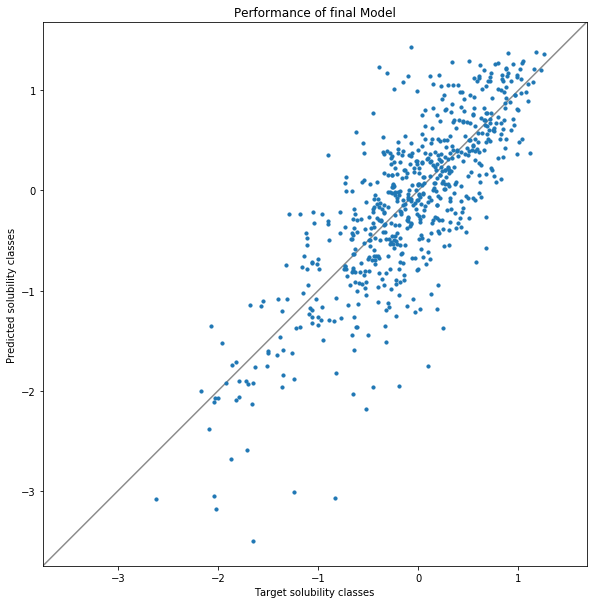

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(pred,act,s=10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [110]:
lin_reg_model = tc.linear_regression.create(data_train, target='Soluble',features = ['X'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2438

Number of features          : 1

Number of unpacked features : 101

Number of coefficients    : 102

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.112443     | 2.856891           | 2.148564             | 0.548878      | 0.535059        |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [112]:
import sklearn
from math import sqrt
predictions = lin_reg_model.predict(data_test)
pred = predictions
act = list(data_test['Soluble'])
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.525234390977
Mean Absolute Error (in g/litre):  0.354574459979
Root Mean Squared Error (in g/litre):  1.3486846946082123


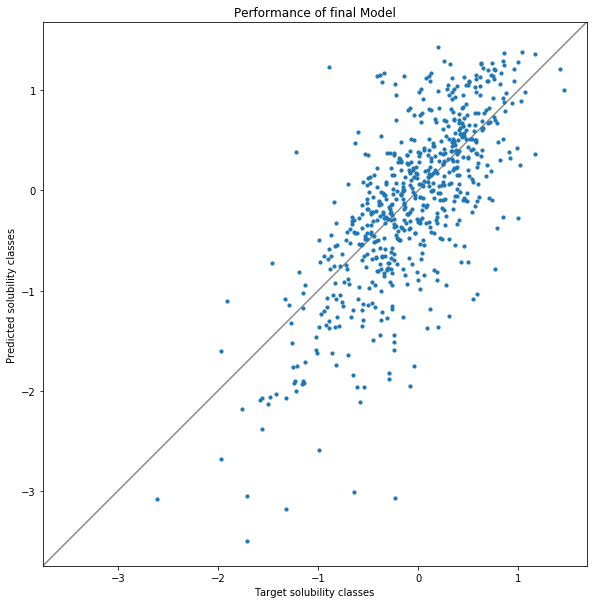

In [113]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(pred,act,s=10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# Simple Dense Network

In [32]:
X_train = X_train.reshape((X_train.shape[0], 101, ))
Y_train = Y_train.reshape((Y_train.shape[0], ))

X_test = X_test.reshape((X_test.shape[0], 101, ))
Y_test = Y_test.reshape((Y_test.shape[0], ))

In [33]:
model = Sequential()
model.add(Dense(200, input_dim=101, kernel_initializer='normal', activation='tanh'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='linear'))
model.add(Dense(1,activation='linear'))

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [34]:
earlystop = EarlyStopping(monitor='val_loss',patience=5, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)

In [35]:
callbacks = [earlystop, reduce_lr]

In [36]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model_info = model.fit(X_train, Y_train, epochs=100, batch_size=100, verbose=2,
                       validation_data=(X_test,Y_test))#,callbacks=callbacks)

Train on 2580 samples, validate on 645 samples
Epoch 1/100
0s - loss: 0.4807 - val_loss: 0.4125
Epoch 2/100
0s - loss: 0.3801 - val_loss: 0.3255
Epoch 3/100
0s - loss: 0.3268 - val_loss: 0.3648
Epoch 4/100
0s - loss: 0.3004 - val_loss: 0.2970
Epoch 5/100
0s - loss: 0.2860 - val_loss: 0.2948
Epoch 6/100
0s - loss: 0.2720 - val_loss: 0.2994
Epoch 7/100
0s - loss: 0.2653 - val_loss: 0.2866
Epoch 8/100
0s - loss: 0.2401 - val_loss: 0.2554
Epoch 9/100
0s - loss: 0.2500 - val_loss: 0.2857
Epoch 10/100
0s - loss: 0.2328 - val_loss: 0.2781
Epoch 11/100
0s - loss: 0.2302 - val_loss: 0.2575
Epoch 12/100
0s - loss: 0.2193 - val_loss: 0.2551
Epoch 13/100
0s - loss: 0.2103 - val_loss: 0.2709
Epoch 14/100
0s - loss: 0.2149 - val_loss: 0.2810
Epoch 15/100
0s - loss: 0.2146 - val_loss: 0.2721
Epoch 16/100
0s - loss: 0.2028 - val_loss: 0.2517
Epoch 17/100
0s - loss: 0.1970 - val_loss: 0.2435
Epoch 18/100
0s - loss: 0.1950 - val_loss: 0.2608
Epoch 19/100
0s - loss: 0.1823 - val_loss: 0.2655
Epoch 20/100

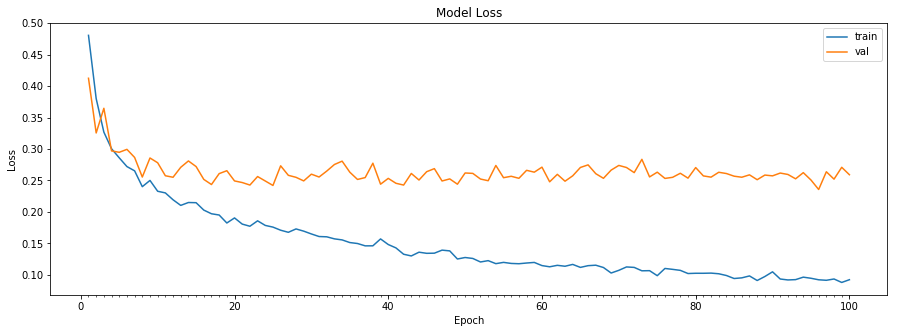

In [37]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(figsize=(15,5))
    axs.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs.set_title('Model Loss')
    axs.set_ylabel('Loss')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(model_info)

In [97]:
import sklearn
pred = model.predict(X_test)
act = Y_test
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.631096645479
Mean Absolute Error (in g/litre):  0.659853980048
Root Mean Squared Error (in g/litre):  6.352623511543814


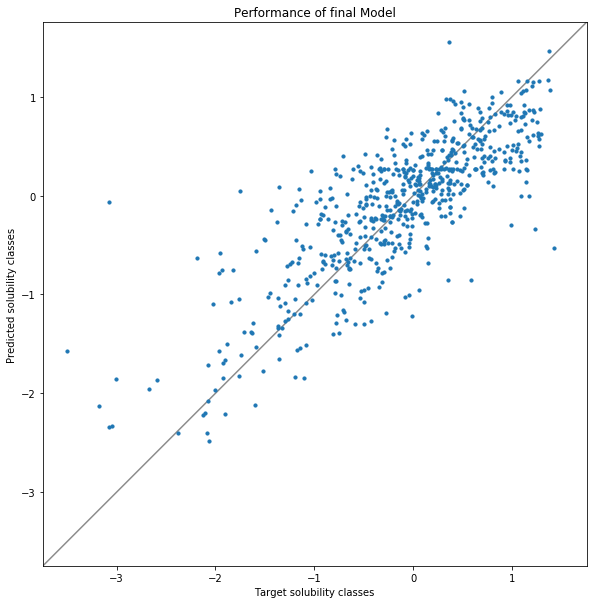

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(Y_test,model.predict(X_test), s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# CNN

In [39]:
data_cnn = X_train[:,:100].reshape((X_train[:,:100].shape[0], 100, 1))
val_data_cnn = X_test[:,:100].reshape(X_test[:,:100].shape[0],100,1)
target = Y_train.reshape(Y_train.shape[0],1)
val_target = Y_test.reshape(Y_test.shape[0],1)
data_mw = X_train[:,-1].reshape((X_train[:,-1].shape[0],1))
val_data_mw = X_test[:,-1].reshape((X_test[:,-1].shape[0],1))
# val_target = Y_test

In [40]:
branch1 = Sequential()

branch1.add(Conv1D(2,3,activation='tanh',input_shape=(100, 1)))
branch1.add(Conv1D(4,3,activation='tanh'))
branch1.add(Conv1D(6,3,activation='tanh'))
branch1.add(Dropout(0.2))
branch1.add(Conv1D(8,3,activation='tanh'))
branch1.add(Conv1D(10,3,activation='relu'))
branch1.add(Flatten())
branch1.add(Dense(10))


branch2 = Sequential()
branch2.add(Dense(10,input_dim=1))
branch2.add(Dense(10,activation='linear'))
            
            
cnnmodel =Sequential()
cnnmodel.add(Merge([branch1, branch2], mode = 'concat'))
cnnmodel.add(Dense(1,activation='linear'))
cnnmodel.add(Dense(1,activation='linear'))

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [43]:
cnnmodel.compile(loss='mean_squared_error', optimizer='adam')
cnnmodel_info = cnnmodel.fit([data_cnn,data_mw], target, epochs=20, batch_size=100, verbose=2,
                          validation_data=([val_data_cnn,val_data_mw],val_target))

Train on 2580 samples, validate on 645 samples
Epoch 1/20
0s - loss: 0.2962 - val_loss: 0.2961
Epoch 2/20
0s - loss: 0.2878 - val_loss: 0.3084
Epoch 3/20
0s - loss: 0.2794 - val_loss: 0.2909
Epoch 4/20
0s - loss: 0.2789 - val_loss: 0.2810
Epoch 5/20
0s - loss: 0.2759 - val_loss: 0.2792
Epoch 6/20
0s - loss: 0.2709 - val_loss: 0.2789
Epoch 7/20
0s - loss: 0.2797 - val_loss: 0.2887
Epoch 8/20
0s - loss: 0.2726 - val_loss: 0.2773
Epoch 9/20
0s - loss: 0.2701 - val_loss: 0.2876
Epoch 10/20
0s - loss: 0.2627 - val_loss: 0.2946
Epoch 11/20
0s - loss: 0.2679 - val_loss: 0.2854
Epoch 12/20
0s - loss: 0.2608 - val_loss: 0.2817
Epoch 13/20
0s - loss: 0.2619 - val_loss: 0.2862
Epoch 14/20
0s - loss: 0.2607 - val_loss: 0.2795
Epoch 15/20
0s - loss: 0.2602 - val_loss: 0.2826
Epoch 16/20
0s - loss: 0.2571 - val_loss: 0.2805
Epoch 17/20
0s - loss: 0.2527 - val_loss: 0.2783
Epoch 18/20
0s - loss: 0.2592 - val_loss: 0.2978
Epoch 19/20
0s - loss: 0.2552 - val_loss: 0.2921
Epoch 20/20
0s - loss: 0.2520 -

In [99]:
import sklearn
pred = cnnmodel.predict([val_data_cnn,val_data_mw])
act = val_target
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.597962549453
Mean Absolute Error (in g/litre):  0.326776055304
Root Mean Squared Error (in g/litre):  1.281002269463329


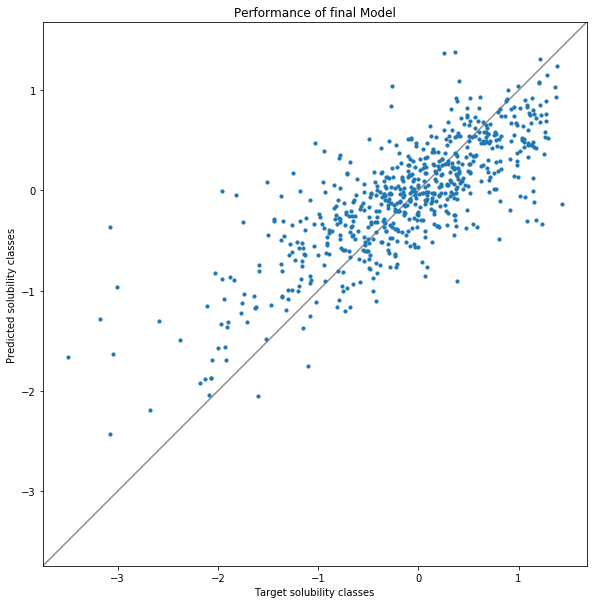

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(val_target,cnnmodel.predict([val_data_cnn,val_data_mw]), s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# RNN - Performs very poorly

In [61]:
# # The standard model
# # Here 50, the dimensionality of the output from LSTM is just a random no and has no suxh signifance, 
# # That ^^ shuould be search via a hyperparameter search

# branch1 = Sequential()
# # The a<final output> will have 50 numbers 
# branch1.add(LSTM(100, input_shape=(100, 1)))
# # branch1.add(Dropout(0.2))
# branch1.add(Dense(200,activation='tanh'))



# branch2 = Sequential()
# branch2.add(Dense(5,input_dim=1))
# rnnmodel =Sequential()
# rnnmodel.add(Merge([branch1, branch2], mode = 'concat'))
# rnnmodel.add(Dense(10,activation='relu'))
# rnnmodel.add(Dense(5,activation='linear'))
# rnnmodel.add(Dense(1,activation='linear'))

In [62]:
# rnnmodel.compile(loss='mean_squared_error', optimizer='rmsprop')
# rnnmodel_info = cnnmodel.fit([data_cnn,data_mw], target, epochs=100, batch_size=1000, verbose=2,
#                           validation_data=([val_data_cnn,val_data_mw],val_target))

In [63]:
# fig, ax = plt.subplots(figsize=(20, 10))
# ax.scatter(val_target,rnnmodel.predict([val_data_cnn,val_data_mw]), s= 10)
# plt.xlabel('Target solubility classes')
# plt.ylabel('Predicted solubility classes')
# plt.title('Performance of final Model')
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]

# # now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)
# plt.show()

# AutoSklearn

In [23]:
# import sklearn.model_selection
# import sklearn.datasets
# import sklearn.metrics

# import autosklearn.regression

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# feature_types = (['numerical'] * 101)# + ['categorical'] + (['numerical'] * 9)

# automl = autosklearn.regression.AutoSklearnRegressor()
# #     time_left_for_this_task=120,
# #     per_run_time_limit=30,
# #     tmp_folder='/tmp/autosklearn_regression_example_tmp',
# #     output_folder='/tmp/autosklearn_regression_example_out',
# # )

# automl.fit(X_train, Y_train)#, dataset_name='molc',feat_type=feature_types)

# print(automl.show_models())
# predictions = automl.predict(X_test)
# print("R2 score:", sklearn.metrics.r2_score(Y_test, predictions))

In [24]:
import pickle
with open('auto_model.pkl','rb') as handle:
    automl = pickle.load(handle)

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Imputer from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator VarianceThreshold from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator SelectPercentile from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  U

In [100]:
import sklearn
pred = automl.predict(X_test)
act = Y_test
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.654090017418
Mean Absolute Error (in g/litre):  0.306127788458
Root Mean Squared Error (in g/litre):  1.13155944277618


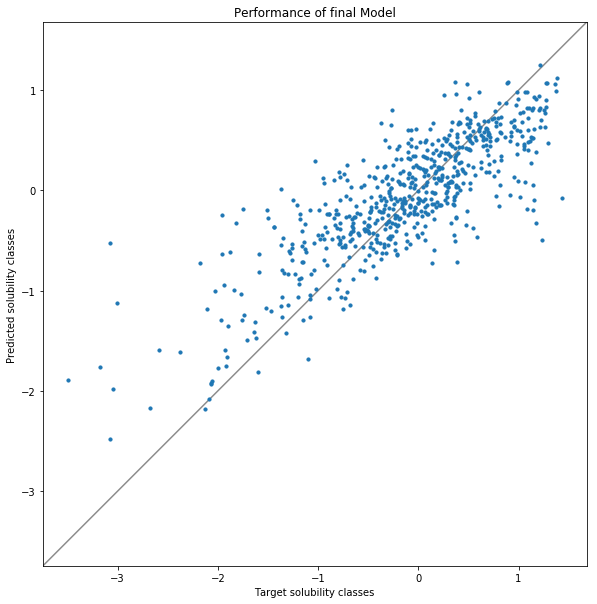

In [25]:
predictions = automl.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(Y_test,predictions, s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# SkNN

In [105]:
from sknn.mlp import Regressor, Layer
from sklearn.grid_search import RandomizedSearchCV,GridSearchCV
from scipy import stats


nn = Regressor(
    layers=[
        Layer("Rectifier", units=200),
        Layer("Rectifier", units=50),
        Layer("Linear", units=10),
        Layer("Linear")],
    learning_rate=0.002,
    n_iter=15)

# rs = RandomizedSearchCV(nn, param_distributions={
#     'learning_rate': stats.uniform(0.001, 0.005),
#     'hidden0__units': stats.randint(50, 200),
#     'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"]})

# gs = GridSearchCV(nn, param_grid={
#     'learning_rate': [0.005, 0.001],
#     'hidden0__units': [50, 100, 200],
#     'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"]})

nn.fit(X_train, Y_train)

Regressor(batch_size=1, callback=None, debug=False, dropout_rate=None,
     f_stable=0.001,
     hidden0=<sknn.nn.Layer `Rectifier`: name='hidden0', units=200, frozen=False>,
     hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=50, frozen=False>,
     hidden2=<sknn.nn.Layer `Linear`: name='hidden2', units=10, frozen=False>,
     layers=[<sknn.nn.Layer `Rectifier`: name='hidden0', units=200, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=50, frozen=False>, <sknn.nn.Layer `Linear`: name='hidden2', units=10, frozen=False>, <sknn.nn.Layer `Linear`: name='output', units=1, frozen=False>],
     learning_momentum=0.9, learning_rate=0.002, learning_rule='sgd',
     loss_type=None, n_iter=15, n_stable=10, normalize=None,
     output=<sknn.nn.Layer `Linear`: name='output', units=1, frozen=False>,
     parameters=None, random_state=None, regularize=None, valid_set=None,
     valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [106]:
import sklearn
pred = nn.predict(X_test)
act = Y_test
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.59807888513
Mean Absolute Error (in g/litre):  0.387457642652
Root Mean Squared Error (in g/litre):  1.559464562483134


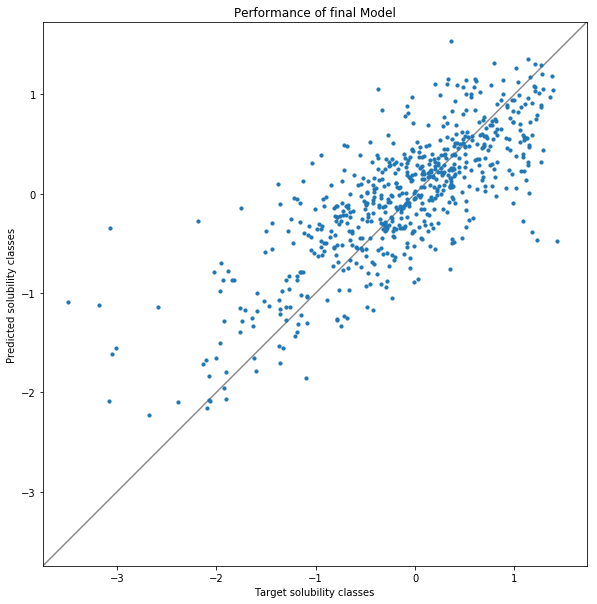

In [109]:
predictions = nn.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(Y_test,predictions, s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [ ]:
| ConvNet  | R2:  0.6282006384214354
Mean Absolute Error (in g/litre):  0.3070177533342374
Root Mean Squared Error (in g/litre):  1.1441674799207011 |
| -------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| DenseNet | R2:  0.6453372173722867
Mean Absolute Error (in g/litre):  0.37831501737500695
Root Mean Squared Error (in g/litre):  1.380492964248265 |